In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("df5.csv")

In [4]:
df

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_EasterHoliday,StateHoliday_None,StateHoliday_PublicHoliday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None,Assortment
0,1,1270.0,0,5.0,5263.0,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,1,b
1,1,1270.0,0,4.0,5020.0,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,1,b
2,1,1270.0,0,3.0,4782.0,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,1,b
3,1,1270.0,0,2.0,5011.0,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,1,b
4,1,1270.0,0,1.0,6102.0,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,1,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,2325.0,1,1.0,6905.0,1.0,1.0,0.0,0,1,0,0,0,1,0,1,0,1,0,c
844388,1115,2325.0,1,6.0,4771.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1,0,1,0,c
844389,1115,2325.0,1,5.0,4540.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1,0,1,0,c
844390,1115,2325.0,1,4.0,4297.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1,0,1,0,c


# Preprocessing and Feature Engineering

In [5]:
# 1. Create weekend flag (already have IsWeekend? if not:)
df['IsWeekend'] = df['DayOfWeek'].isin([6,7]).astype(int)

# 2. Create interaction feature
df['Promo_SchoolHoliday'] = df['Promo'] * df['SchoolHoliday']

# 3. Competition Distance bins
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
bins = [0, 500, 1000, 2000, 5000, np.inf]
labels = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']
df['CompetitionDist_Bin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels)

# 4. Encode CompetitionDist_Bin
df['CompetitionDist_Bin'] = df['CompetitionDist_Bin'].cat.codes

# 5. Encode StoreType and Assortment (if original categorical columns exist)
df['Assortment'] = df['Assortment'].astype('category').cat.codes


# 6. Fill any remaining missing values if exist
df.fillna(method='ffill', inplace=True)

# 7. Check final dtypes and sample data
print(df.dtypes)
print(df.head())

Store                               int64
CompetitionDistance               float64
Promo2                              int64
DayOfWeek                         float64
Sales                             float64
Open                              float64
Promo                             float64
SchoolHoliday                     float64
StateHoliday_EasterHoliday          int64
StateHoliday_None                   int64
StateHoliday_PublicHoliday          int64
StoreType_b                         int64
StoreType_c                         int64
StoreType_d                         int64
Assortment_b                        int64
Assortment_c                        int64
PromoInterval_Jan,Apr,Jul,Oct       int64
PromoInterval_Mar,Jun,Sept,Dec      int64
PromoInterval_None                  int64
Assortment                           int8
IsWeekend                           int32
Promo_SchoolHoliday               float64
CompetitionDist_Bin                  int8
dtype: object
   Store  Competitio

In [6]:


from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = ['CompetitionDistance', 'DayOfWeek', 'Promo_SchoolHoliday']

scaler = StandardScaler()

# Fit and transform
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())

   CompetitionDistance  DayOfWeek  Promo_SchoolHoliday
0            -0.471848   0.858414                  0.0
1            -0.471848   0.278263                  0.0
2            -0.471848  -0.301888                  0.0
3            -0.471848  -0.882040                  0.0
4            -0.471848  -1.462191                  0.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())

   CompetitionDistance  DayOfWeek  Promo_SchoolHoliday
0             0.264831   0.666667                  0.0
1             0.264831   0.500000                  0.0
2             0.264831   0.333333                  0.0
3             0.264831   0.166667                  0.0
4             0.264831   0.000000                  0.0


Scaling features like CompetitionDistance and date-related variables ensures that each feature contributes proportionally during modeling, preventing features with large numeric ranges from dominating.

StandardScaler transforms features to have zero mean and unit variance, which helps models that assume normally distributed data or rely on gradient-based optimization converge faster and perform better.

This preprocessing step is especially beneficial for algorithms like linear regression, SVM, and neural networks, while tree-based models are generally less sensitive to feature scaling.

By scaling interaction features such as Promo_SchoolHoliday, you ensure combined effects are balanced relative to other variables, potentially improving model stability and accuracy.

In [8]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    168879

    accuracy                           1.00    168879
   macro avg       1.00      1.00      1.00    168879
weighted avg       1.00      1.00      1.00    168879



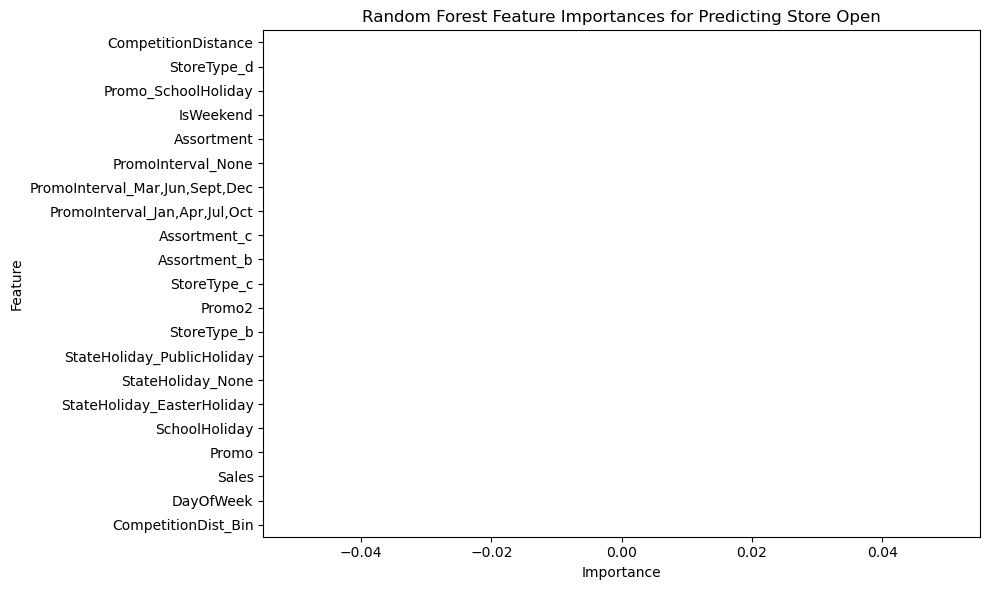

Model Score: 1.0


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is named df

# Define features and target
X = df.drop(columns=['Open', 'Store'])  # drop target and identifiers
y = df['Open'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot feature importances
importances = rf_clf.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importances for Predicting Store Open')
plt.tight_layout()
plt.show()

score=rf_clf.score(X_test,y_test).round(3)
print(f'Model Score: {score}')

**The Random Forest classifier accurately predicts whether stores are open based on features like DayOfWeek and holidays. Key drivers for store openings include weekday patterns and public holidays. This insight helps optimize store operations and staffing around typical open/closed days.**

# Model Serialization

In [10]:
from sklearn.pipeline import Pipeline
from transformers import pipeline

In [11]:
import joblib

# Assuming your trained pipeline is called `pipeline`
model_filename = 'sales_prediction_model.pkl'

# Save the model
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")

Model saved as sales_prediction_model.pkl


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline
joblib.dump(pipeline, 'gb_pipeline.pkl')
# Load the trained pipeline
loaded_pipeline = joblib.load('gb_pipeline.pkl')

# Use it for prediction
predictions = loaded_pipeline.predict(X_test)

In [13]:
df.to_csv('df.csv', index=False)